## Create a MLflow experiment

### Define the name of the experiment, and artifact_location, tags as default values for MLflow runs in the future.

In [1]:
import mlflow

if __name__ == "__main__":
    # create a new mlflow experiment
    mlflow.create_experiment(
        name = "MyFirstMLflow",
        artifact_location = "MyFirstMLflow_artifact_loc",
        tags={"env":"dev", "version":"1.0.0"}
    )

MlflowException: Experiment 'MyFirstMLflow' already exists.

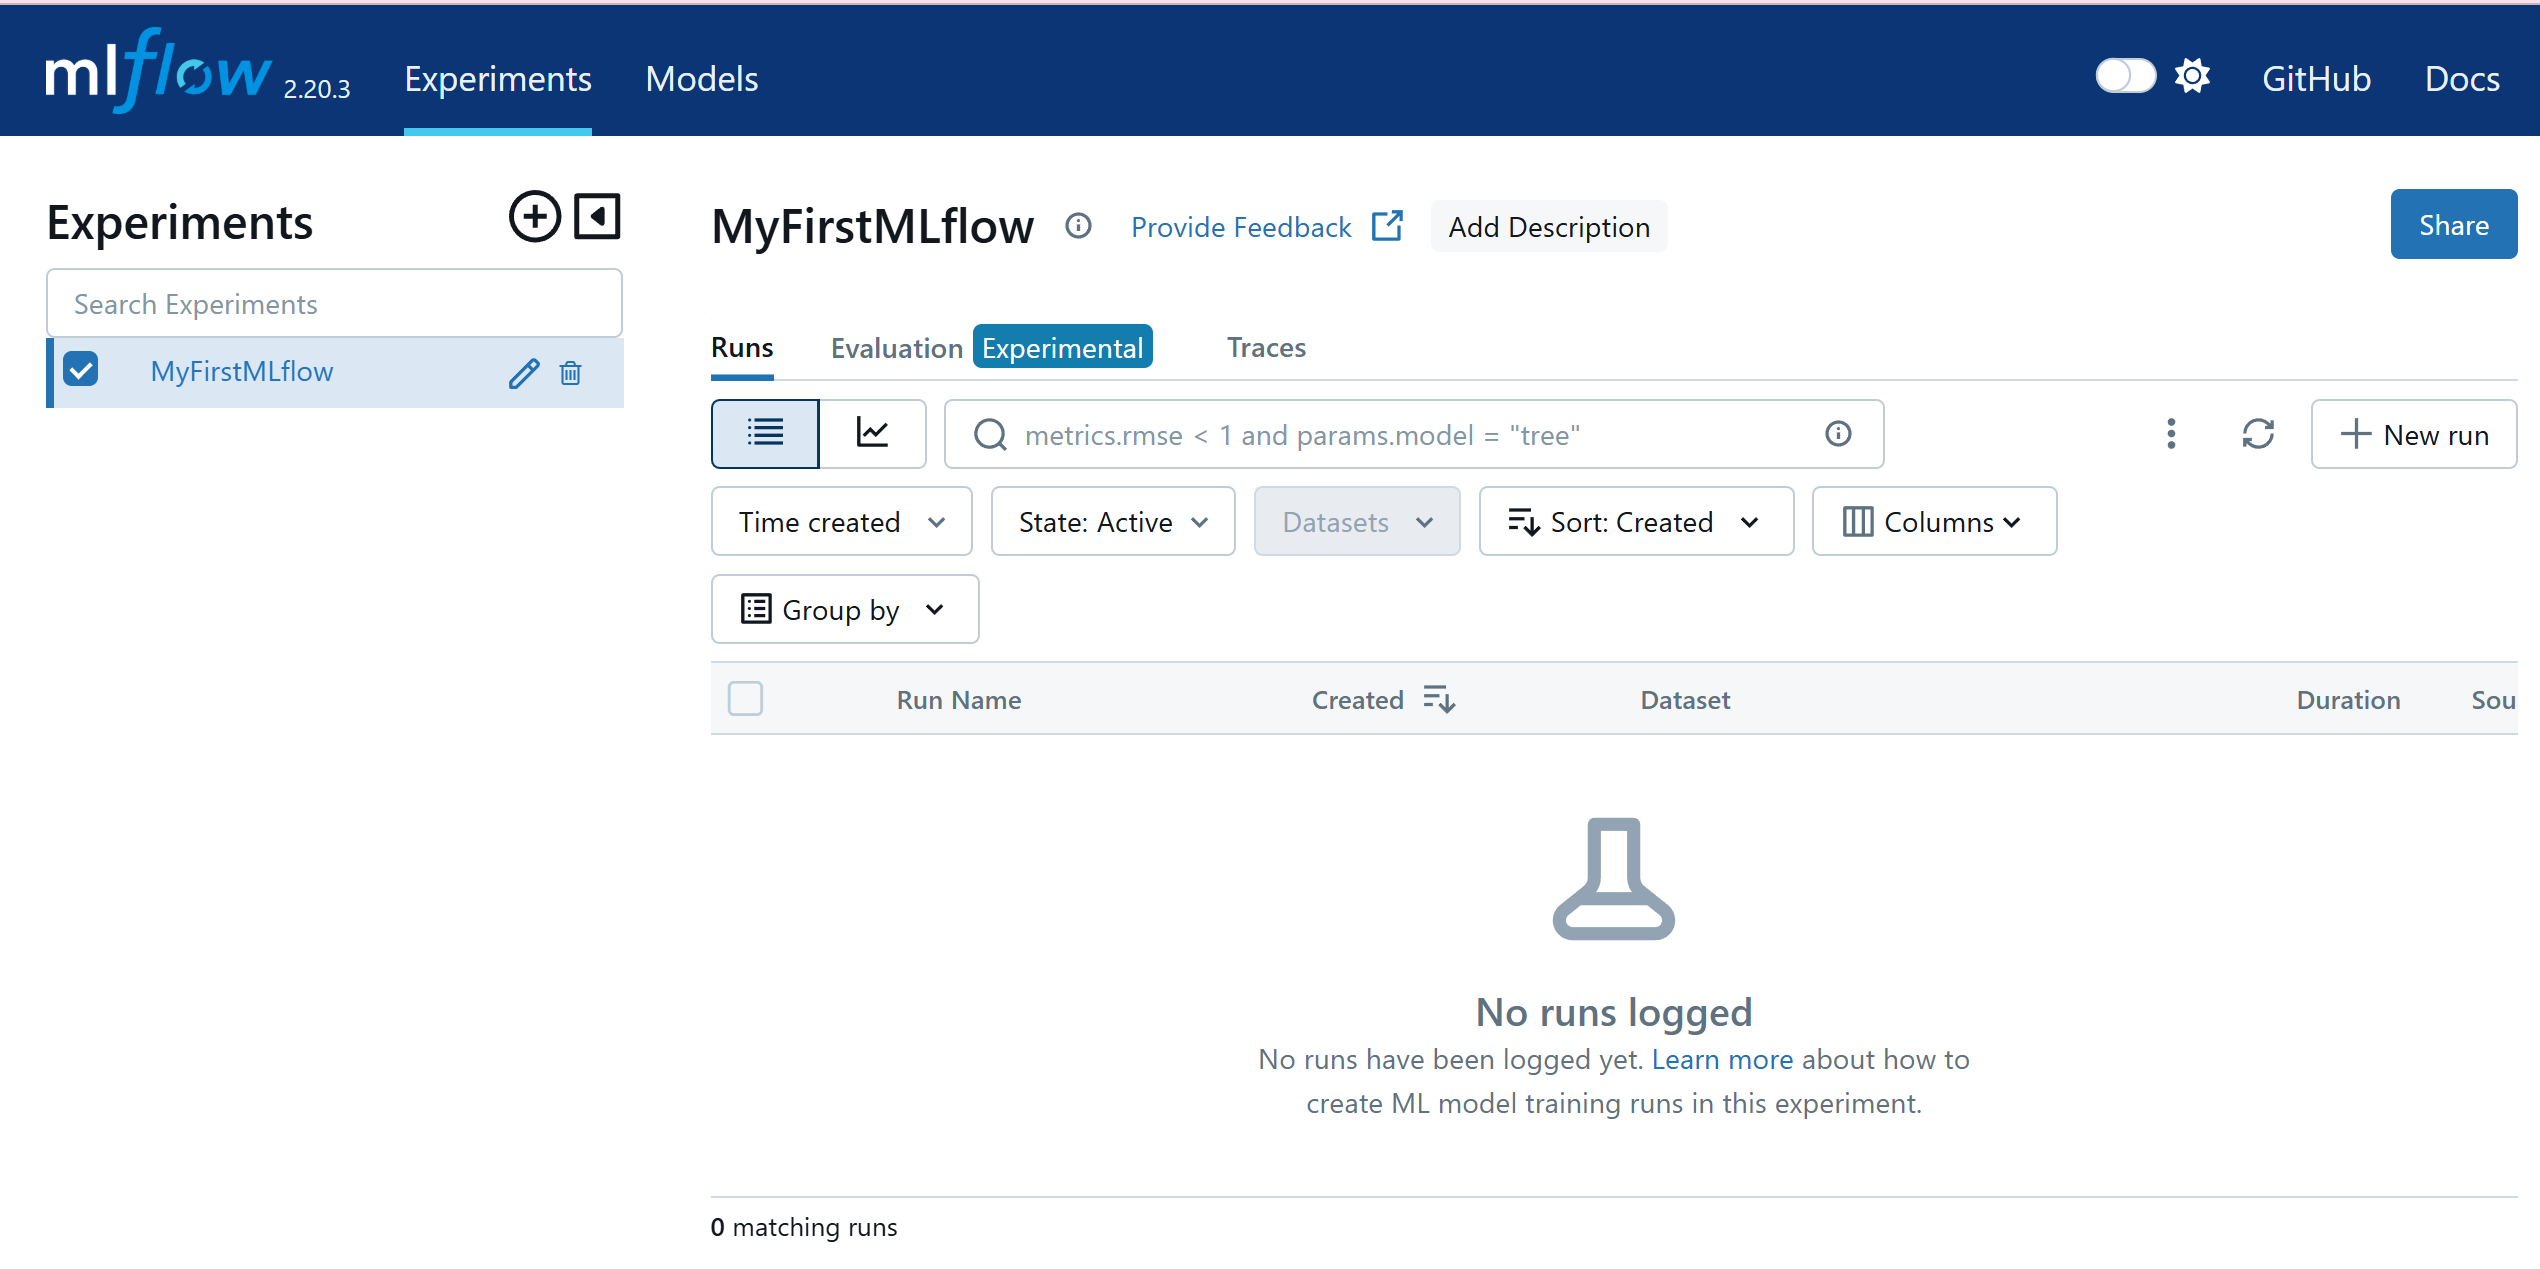

### Make functions in a seperate file(mlflow_utils.py) and call the functions to create, retrive, and delete an experiment

##### The function creates an experiment only when there is no existing experiment with the name requested and returns the experiment_id 

In [ ]:
""" In mlflow_utils.py"""

import mlflow
from typing import Any

def create_mlflow_experiment(experiment_name: str, artifact_location: str, tags: dict[str,Any]) -> str:
    """
    Create a new mlflow experiment with the given name and artifact location
    """
    try:
        experiment_id = mlflow.create_experiment(
            name=experiment_name, artifact_location=artifact_location, tags=tags
        )
    except:
        print(f"Experiment {experiment_name} already exists.")
        experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
        
    return experiment_id


#### Now, you can call the function and create a new MLflow experiment.

In [3]:
from mlflow_utils import create_mlflow_experiment

if __name__ == "__main__":
    experiment_id = create_mlflow_experiment(experiment_name="MySecondMLflow",
                                              artifact_location="MySecondMLflow_artifact_loc",
                                              tags={"env":"dev", "version":"1.0.0"})
    print(f"Experiement ID: {experiment_id}")

Experiement ID: 977725533440491376


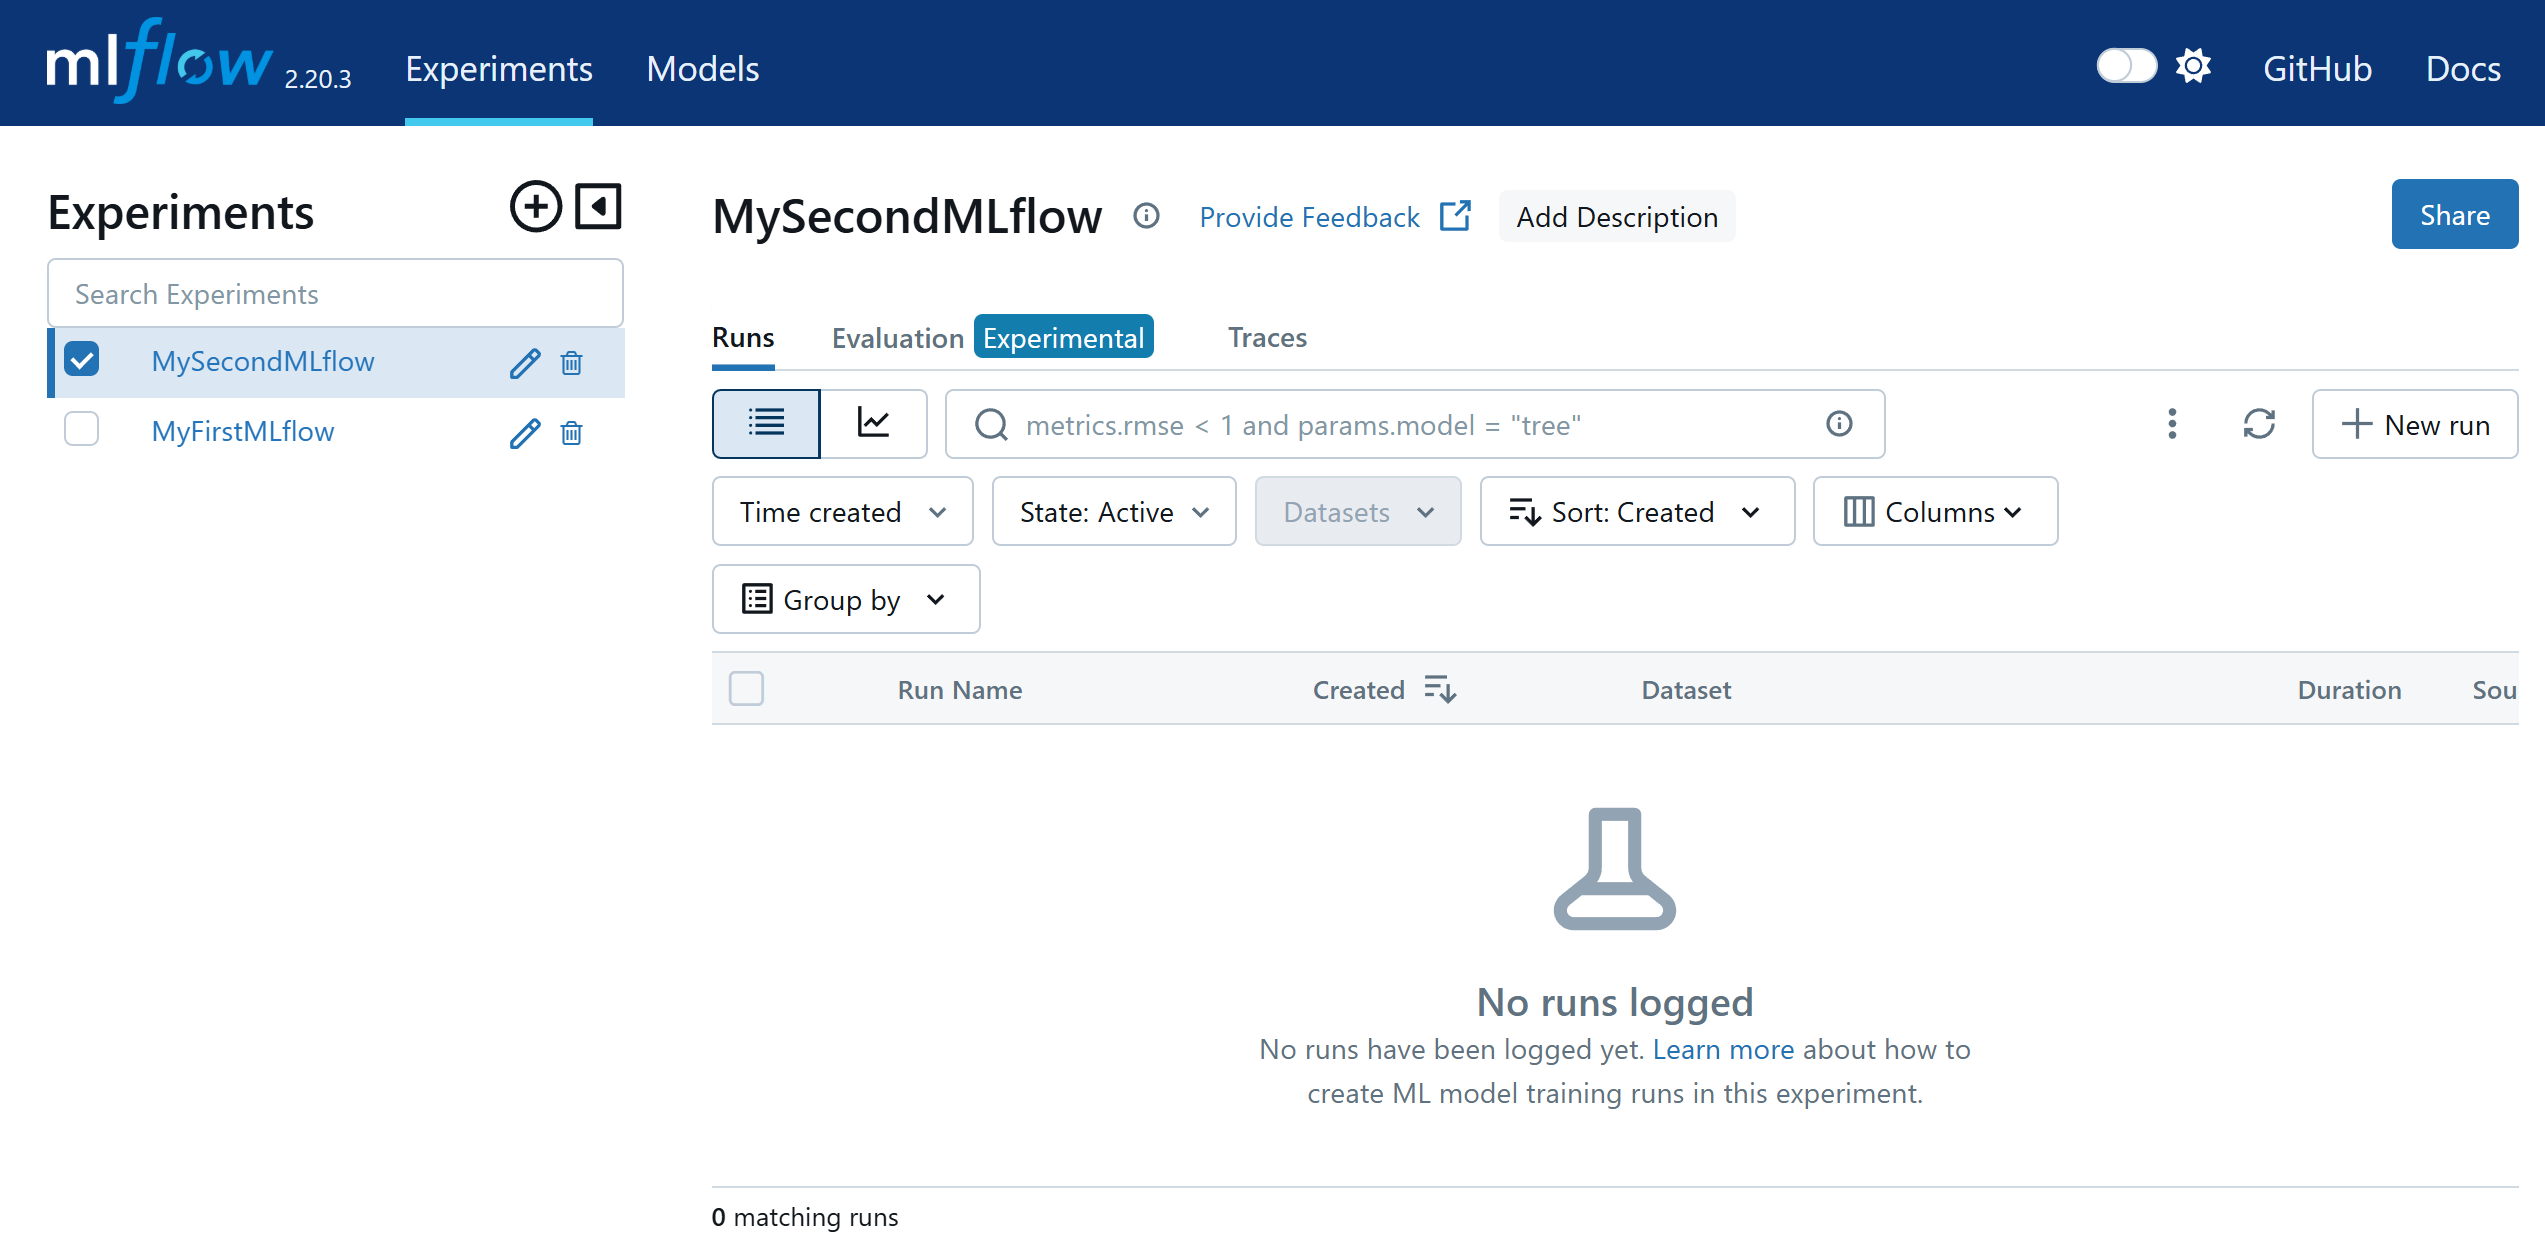

##### The function retrieves an experiment with arguments; experiment_id or experiment_name

In [4]:
""" In mlflow_utils.py"""

import mlflow
from typing import Any

def get_mlflow_experiment(
        experiment_id: str = None, experiment_name: str = None
    ) -> mlflow.entities.Experiment:
    """
    Retrieve the mlflow experiment with the given id or name.

    Parameters:
    ----------
    experiment_id: str
        The id of the experiment to retrieve.
    experiment_name: str
        The name of the experiment to retrieve.

    Returns:
    -------
    experiment: mlflow.entities.Experiment
        The mlflow experiment with the given id or name.
    """
    if experiment_id is not None:
        experiment = mlflow.get_experiment(experiment_id)
    elif experiment_name is not None:
        experiment = mlflow.get_experiment_by_name(experiment_name)
    else:
        raise ValueError("Either experiment_id or experiment_name must be provided.")
    return experiment


##### Retrieve an MLflow experiment and print the info

In [5]:
from mlflow_utils import get_mlflow_experiment

if __name__ == "__main__":
    # retrieve an MLflow experiment with its id
    experiment = get_mlflow_experiment(experiment_id="977725533440491376")

    # retrieve an MLflow experiment with its name
    # experiment = get_mlflow_experiment(experiment_name="MySecondMLflow")

    print("name: {}".format(experiment.name), "\n",
          "Experiment_id: {}".format(experiment.experiment_id), "\n",
          "Artifact location: {}".format(experiment.artifact_location), "\n",
          "Tags: {}".format(experiment.tags), "\n",
          "Lifecycle_stage: {}".format(experiment.lifecycle_stage), "\n",
          "Creation_time: {}".format(experiment.creation_time))

name: MySecondMLflow 
 Experiment_id: 977725533440491376 
 Artifact location: file:///c:/Users/dof07/Desktop/mlflow/MySecondMLflow_artifact_loc 
 Tags: {'env': 'dev', 'version': '1.0.0'} 
 Lifecycle_stage: active 
 Creation_time: 1741046879213


##### The function deletes an experiment with arguments; experiment_id or experiment_name

In [ ]:
def delete_mlflow_experiment(
    experiment_id: str = None, experiment_name: str = None
) -> None:
    """
    Delete the mlflow experiment with the given id or name.

    Parameters:
    ----------
    experiment_id: str
        The id of the experiment to delete.
    experiment_name: str
        The name of the experiment to delete.
    """
    if experiment_id is not None:
        mlflow.delete_experiment(experiment_id)
    elif experiment_name is not None:
        experiment = mlflow.get_experiment_by_name(experiment_name)
        experiment_id = experiment.experiment_id
        mlflow.delete_experiment(experiment_id)
    else:
        raise ValueError("Either experiment_id or experiment_name must be provided.")

##### Delete an MLflow experiment

In [7]:
import mlflow

mlflow.delete_experiment(experiment_id="977725533440491376")
# mlflow.delete_experiment(experiment_name="MySecondMLflow")

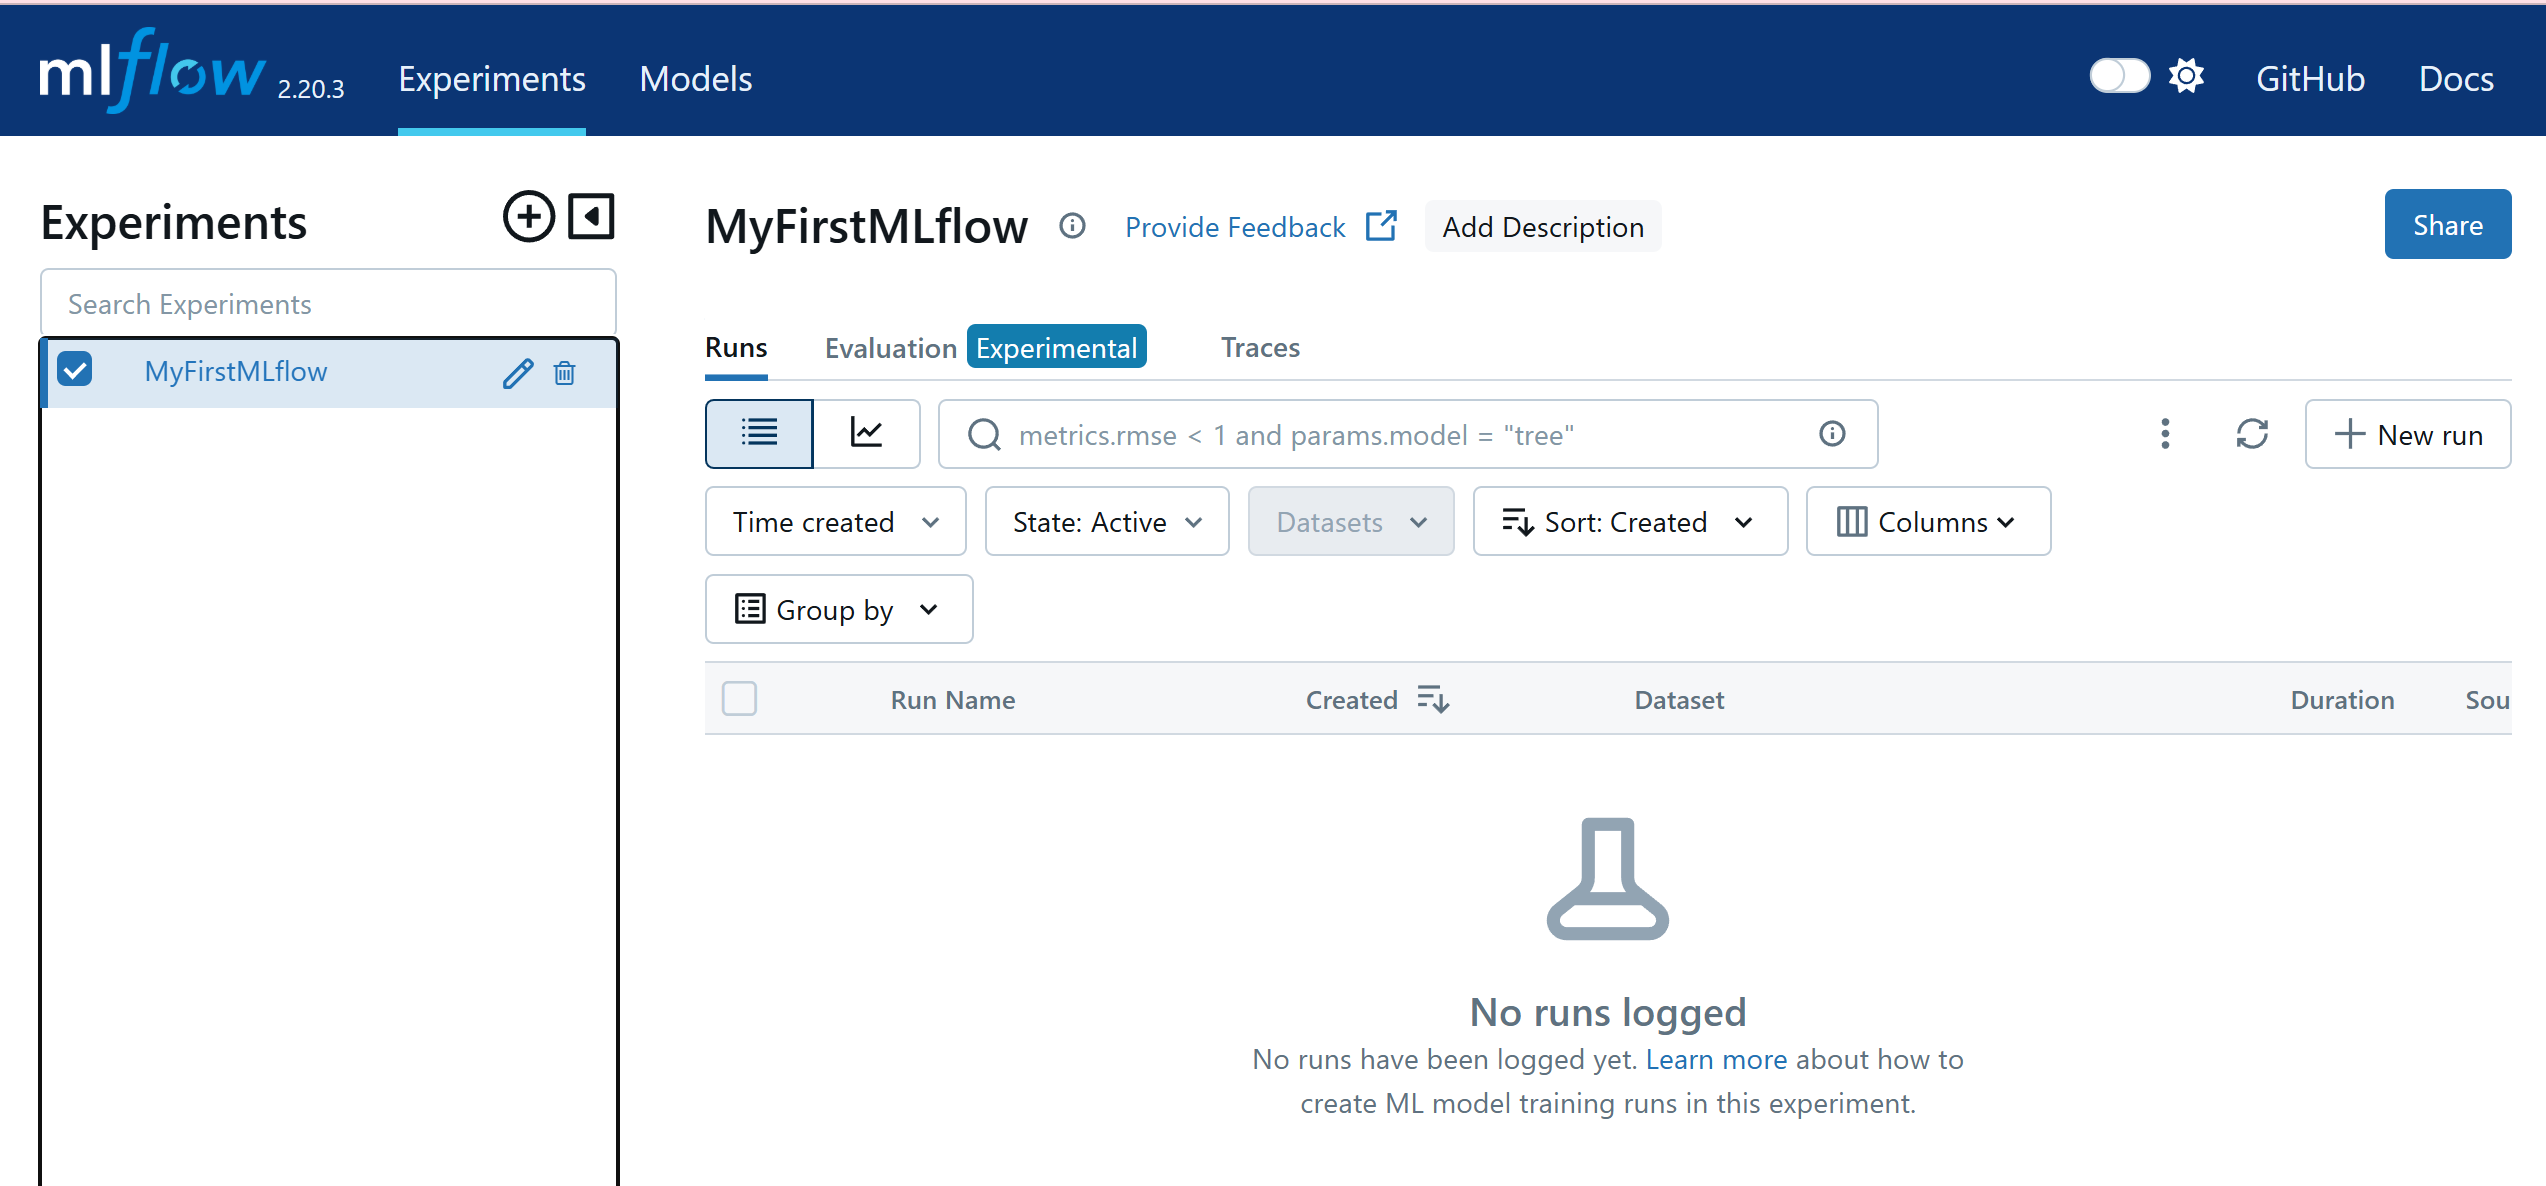

#### NOTE

##### Creating an experiment outputs info folders and files sush as models(folder), experiment_id(folder), meta.yaml and tags(env, version as predefined)

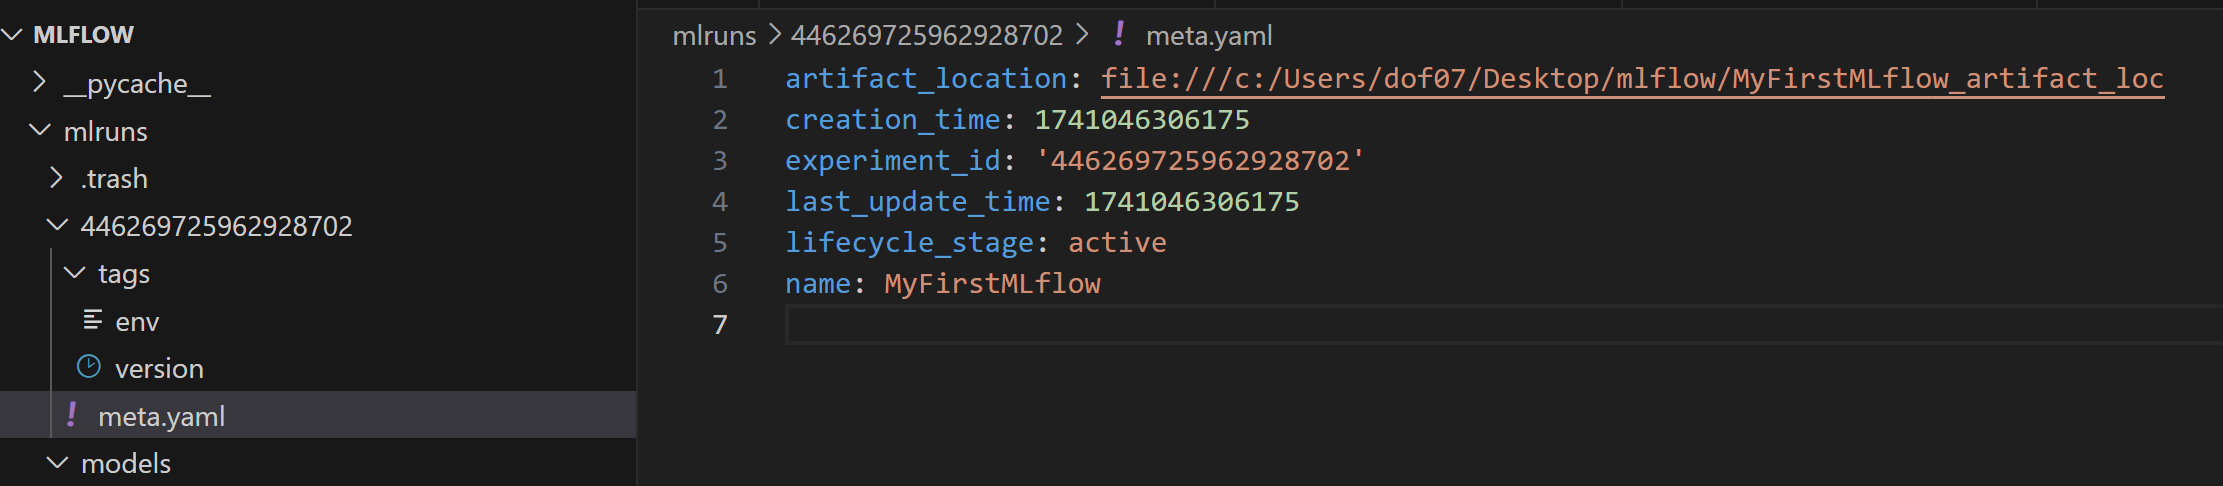